The G1 Climax is an annual Japanase wrestling tournament that's held every summer over 20 days. Rather than a simple knockout tournament it's a league made up two blocks each consisting of 20 wrestlers. The winner of each block then face off and the winner goes to headline wrestle kingdom in January

Let's start off with importing all the relevant libraries which will be updated as we go

Add times to matches, to see who on average has the longest time. Wrestler style, weight, momemntum?
If they won the last match are they going to win the next one


In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
pd.options.display.float_format = '{:,.0f}'.format
sns.set_style('white')

Read the csv file with the block names

In [2]:
df = pd.read_csv("G1 Competitors.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
A Block    10 non-null object
B Block    10 non-null object
dtypes: object(2)
memory usage: 240.0+ bytes


Only 10 entries with No null objects which is good to see, we can see what the whole dataframe looks like. Of course if we had more rows we wouldn't be able to do this.

In [4]:
df

,A Block,B Block
0,Hiroshi Tanahashi,Kazuchika Okada
1,Togi Makabe,Toru Yano
2,Tomohiro Ishii,Satoshi Kojima
3,Hirooki Goto,Michael Elgin
4,YOSHI-HASHI,Juice Robinson
5,Bad Luck Fale,Tama Tonga
6,Yuji Nagata,SANADA
7,Zack Sabre Jr.,EVIL
8,Kota Ibushi,Minoru Suzuki
9,Tetsuya Naito,Kenny Omega


Some of the wrestler's name have capitals while others don't, let's seperate these into two blocks and make sure we convert all strings to uppercase

In [5]:
A_Block = pd.DataFrame(df['A Block'].str.upper())
A_Block.columns = ['Wrestler']
B_Block = pd.DataFrame(df['B Block'].str.upper())
B_Block.columns = ['Wrestler']

In [6]:
A_Block['Matches'] = np.NAN
A_Block['Wins'] = np.NAN
A_Block['Losses'] = np.NAN
A_Block['Draws'] = np.NAN
A_Block['Points'] = np.NAN
A_Block['Match_Time'] = np.NAN
B_Block['Matches'] = np.NAN
B_Block['Wins'] = np.NAN
B_Block['Losses'] = np.NAN
B_Block['Draws'] = np.NAN
B_Block['Points'] = np.NAN
B_Block['Match_Time'] = np.NAN

In [7]:
A_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time
0,HIROSHI TANAHASHI,nan,nan,nan,nan,nan,nan
1,TOGI MAKABE,nan,nan,nan,nan,nan,nan
2,TOMOHIRO ISHII,nan,nan,nan,nan,nan,nan
3,HIROOKI GOTO,nan,nan,nan,nan,nan,nan
4,YOSHI-HASHI,nan,nan,nan,nan,nan,nan
5,BAD LUCK FALE,nan,nan,nan,nan,nan,nan
6,YUJI NAGATA,nan,nan,nan,nan,nan,nan
7,ZACK SABRE JR.,nan,nan,nan,nan,nan,nan
8,KOTA IBUSHI,nan,nan,nan,nan,nan,nan
9,TETSUYA NAITO,nan,nan,nan,nan,nan,nan


In [8]:
B_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time
0,KAZUCHIKA OKADA,nan,nan,nan,nan,nan,nan
1,TORU YANO,nan,nan,nan,nan,nan,nan
2,SATOSHI KOJIMA,nan,nan,nan,nan,nan,nan
3,MICHAEL ELGIN,nan,nan,nan,nan,nan,nan
4,JUICE ROBINSON,nan,nan,nan,nan,nan,nan
5,TAMA TONGA,nan,nan,nan,nan,nan,nan
6,SANADA,nan,nan,nan,nan,nan,nan
7,EVIL,nan,nan,nan,nan,nan,nan
8,MINORU SUZUKI,nan,nan,nan,nan,nan,nan
9,KENNY OMEGA,nan,nan,nan,nan,nan,nan


How many potential matches per block?
Using the old permuations formula

In [9]:
math.factorial(10)/(math.factorial(2)*math.factorial(10-2))

45.0

Ok there are 45 possible matches, I was going to write a custom function to list all these out but the python community is so large someone has already done what you need. Luckily they have and it comes from the library itertools. We use the function combinations as we're looking for all unique combinations and not permutations. The combination takes a list so we can't simply pass in the data frame and need to select the Wrestler column as a series. W

In [10]:
A_matches = pd.DataFrame.from_records(list(itertools.combinations(A_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
B_matches = pd.DataFrame.from_records(list(itertools.combinations(B_Block['Wrestler'],2)), columns = ['Wrestler 1', 'Wrestler 2'])
A_matches['Winner'] = np.NAN
B_matches['Winner'] = np.NAN
A_matches['Loser'] = np.NAN
B_matches['Loser'] = np.NAN
A_matches['Match'] = 1
B_matches['Match'] = 1
B_matches['Match_Time'] = np.NAN
A_matches['Match_Time'] = np.NAN
B_matches['Draw'] = False
A_matches['Draw'] = False

In [30]:
A_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time,Draw
0,HIROSHI TANAHASHI,TOGI MAKABE,HIROSHI TANAHASHI,TOGI MAKABE,1,00:13:34,False
1,HIROSHI TANAHASHI,TOMOHIRO ISHII,HIROSHI TANAHASHI,TOMOHIRO ISHII,1,00:23:30,False
2,HIROSHI TANAHASHI,HIROOKI GOTO,HIROSHI TANAHASHI,HIROOKI GOTO,1,00:17:22,False
3,HIROSHI TANAHASHI,YOSHI-HASHI,HIROSHI TANAHASHI,YOSHI-HASHI,1,00:13:34,False
4,HIROSHI TANAHASHI,BAD LUCK FALE,HIROSHI TANAHASHI,BAD LUCK FALE,1,00:11:05,False
5,HIROSHI TANAHASHI,YUJI NAGATA,HIROSHI TANAHASHI,YUJI NAGATA,1,00:14:47,False
6,HIROSHI TANAHASHI,ZACK SABRE JR.,ZACK SABRE JR.,HIROSHI TANAHASHI,1,00:17:18,False
7,HIROSHI TANAHASHI,KOTA IBUSHI,KOTA IBUSHI,HIROSHI TANAHASHI,1,00:20:40,False
8,HIROSHI TANAHASHI,TETSUYA NAITO,TETSUYA NAITO,HIROSHI TANAHASHI,1,00:26:41,False
9,TOGI MAKABE,TOMOHIRO ISHII,TOMOHIRO ISHII,TOGI MAKABE,1,00:15:51,False


In [12]:
B_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time,Draw
0,KAZUCHIKA OKADA,TORU YANO,nan,nan,1,nan,False
1,KAZUCHIKA OKADA,SATOSHI KOJIMA,nan,nan,1,nan,False
2,KAZUCHIKA OKADA,MICHAEL ELGIN,nan,nan,1,nan,False
3,KAZUCHIKA OKADA,JUICE ROBINSON,nan,nan,1,nan,False
4,KAZUCHIKA OKADA,TAMA TONGA,nan,nan,1,nan,False
5,KAZUCHIKA OKADA,SANADA,nan,nan,1,nan,False
6,KAZUCHIKA OKADA,EVIL,nan,nan,1,nan,False
7,KAZUCHIKA OKADA,MINORU SUZUKI,nan,nan,1,nan,False
8,KAZUCHIKA OKADA,KENNY OMEGA,nan,nan,1,nan,False
9,TORU YANO,SATOSHI KOJIMA,nan,nan,1,nan,False


Ok we now have a table of the potential matches, I decided to write a quick function to update the dataframe with the results rather than updating each row manually. I didn't want to type out the full names either as the spellings of Japanese names can be quite hard. So the function does a partial match and prints out the names it's matched as a check

In [13]:
def updateresults(df,winner,loser, time, draw = False):#We want to find the index for the match for these two wrestlers
    winner = winner.upper() #Tidy up the names
    loser = loser.upper()
    # Search for them in the results table and return their position
    #I really should an error handler but I'm being lazy and this function is a one time use
    w1 = list(df[df['Wrestler 1'].str.contains(winner)].index) 
    w2 = list(df[df['Wrestler 2'].str.contains(winner)].index)
    w3 = w1 + w2
    if not w1:
        winner = df.iloc[w2[0],1]
    else:
        winner = df.iloc[w1[0],0]
    
    l1 = list(df[df['Wrestler 1'].str.contains(loser)].index)
    l2 = list(df[df['Wrestler 2'].str.contains(loser)].index)
    l3 = l1 + l2
    if not l1:
        loser = df.iloc[l2[0],1]
    else:
        loser = df.iloc[l1[0],0]
    i = list(set(w3).intersection(l3))
    i = i[0]
    print(winner + ',' +loser)
    df.iloc[i,5] = time
    #if it's draw add none to winner & loser and turn the draw value to True
    if draw == False:
        df.iloc[i,2] = winner
        df.iloc[i,3] = loser
    else:
        df.iloc[i,2] = 'None'
        df.iloc[i,3] = 'None'
        df.iloc[i,6] = True       
    updatetable()
 



In [19]:
def updatetable():# Function to update the table standings after match results
    global A_Block
    global B_Block
    A_Block['Wins'] = A_Block['Wrestler'].map(A_matches['Winner'].value_counts())
    A_Block['Losses'] = A_Block['Wrestler'].map(A_matches['Loser'].value_counts())
    x = A_matches.loc[A_matches.Draw == True, ['Wrestler 1','Wrestler 2']]
    Draws = (pd.concat([x['Wrestler 1'],x['Wrestler 2']]))
    A_Block['Draws'] = A_Block['Wrestler'].map(Draws.value_counts())
    A_Block = A_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    A_Block['Matches'] = A_Block['Wins'] + A_Block['Losses'] + A_Block['Draws']
    A_Block['Points'] = A_Block['Wins']*2 + A_Block['Draws']
    A_Block = A_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)
    
    B_Block['Wins'] = B_Block['Wrestler'].map(B_matches['Winner'].value_counts())
    B_Block['Losses'] = B_Block['Wrestler'].map(B_matches['Loser'].value_counts())
    x =B_matches.loc[B_matches.Draw == True, ['Wrestler 1','Wrestler 2']]
    Draws = (pd.concat([x['Wrestler 1'],x['Wrestler 2']]))
    B_Block['Draws'] = B_Block['Wrestler'].map(Draws.value_counts())    
    B_Block = B_Block.fillna(0)#replace the nan's with zeroes so we can tally later
    B_Block['Matches'] = B_Block['Wins'] + B_Block['Losses'] + B_Block['Draws']
    B_Block['Points'] = B_Block['Wins']*2 + B_Block['Draws']
    B_Block = B_Block.sort_values(['Points'],ascending=False).reset_index(drop=True)

Let's update our results with Day 1 results. Surprised to see Zack Sabre win over Tanahashi considering he's like the Japan John Cena. If you didn't understand I don't think you'd be reading this!

In [44]:
updateresults(A_matches, 'Zack', 'Tanahashi', '17:18')# Day 1
updateresults(A_matches, 'YOSHI', 'Nagata', '16:29')
updateresults(A_matches, 'Fale', 'Togi', '09:25')
updateresults(A_matches, 'Hirooki', 'Tomohiro', '13:43')
updateresults(A_matches, 'Tetsuya', 'Kota', '24:41')

ZACK SABRE JR.,HIROSHI TANAHASHI
YOSHI-HASHI,YUJI NAGATA
BAD LUCK FALE,TOGI MAKABE
HIROOKI GOTO,TOMOHIRO ISHII
TETSUYA NAITO,KOTA IBUSHI


Did that update our results Table? Let's check out the A Table

In [23]:
A_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time
0,TETSUYA NAITO,9,7,2,0,14,0
1,HIROSHI TANAHASHI,9,6,3,0,12,0
2,BAD LUCK FALE,9,6,3,0,12,0
3,KOTA IBUSHI,9,5,4,0,10,0
4,ZACK SABRE JR.,9,5,4,0,10,0
5,HIROOKI GOTO,9,5,4,0,10,0
6,TOMOHIRO ISHII,9,4,5,0,8,0
7,TOGI MAKABE,9,4,5,0,8,0
8,YOSHI-HASHI,9,2,7,0,4,0
9,YUJI NAGATA,9,1,8,0,2,0


Update the B block matches, no surprises with Okada and Omega going over. I expect one of them to be in the final

In [45]:
updateresults(B_matches,'Juice','Satoshi', '11:48') # Day 2
updateresults(B_matches,'Tonga','Elgin', '13:46')
updateresults(B_matches,'Sanada','Evil','15:48')
updateresults(B_matches,'Okada','Yano', '10:31')
updateresults(B_matches,'Omega','Suzuki','21:24')

updateresults(A_matches, 'Hirooki', 'Nagata', '15:02')# Day3
updateresults(A_matches,'ISHII', 'Togi', '15:51')
updateresults(A_matches,'Ibushi', 'Zack', '15:51')
updateresults(A_matches,'Tanaha', 'Fale', '11:05')
updateresults(A_matches,'Tetsuya', 'Yoshi', '22:19')

updateresults(B_matches, 'Yano', 'Kojima','09:12') # Day 4
updateresults(B_matches, 'Evil', 'Juice','11:46')
updateresults(B_matches, 'Omega', 'Tama','11:42')
updateresults(B_matches, 'Okada', 'Elgin','25:49')
updateresults(B_matches, 'Suzuki', 'Sanada','11:22')

updateresults(A_matches, 'Zack', 'Yoshi','11:48') # Day 5
updateresults(A_matches, 'Hiroshi', 'YUji', '14:47')
updateresults(A_matches, 'Fale', 'Tetsuya', '11:55')
updateresults(A_matches, 'Kota', 'Ishii', '17:14')
updateresults(A_matches, 'Togi', 'Hirooki','16:55')

updateresults(B_matches, 'Elgin', 'Kojima','13:09') # Day 6
updateresults(B_matches, 'Evil', 'Tonga','10:27')
updateresults(B_matches, 'Omega', 'Yano', '11:31')
updateresults(B_matches, 'Okada', 'Sanada', '20:49')
updateresults(B_matches, 'Suzuki', 'Juice', '11:23')

updateresults(A_matches, 'Ishii', 'Yoshi', '15:43') # Day 7
updateresults(A_matches, 'Hiroshi', 'hirooki', '17:22')
updateresults(A_matches, 'Zack', 'Fale', '09:02')
updateresults(A_matches, 'Togi', 'Kota', '13:20')
updateresults(A_matches, 'Tetsuya', 'Nagata', '15:16')

updateresults(B_matches, 'Okada', 'Kojima', '15:26') # Day 8
updateresults(B_matches, 'Tonga', 'Juice','10:36')
updateresults(B_matches, 'Elgin', 'Omega', '24:39')
updateresults(B_matches, 'Sanada', 'Toru', '04:33')
updateresults(B_matches, 'Evil', 'Suzuki', '08:38')

updateresults(A_matches, 'Hiroshi', 'Yoshi', '13:34') # Day 9
updateresults(A_matches, 'Hirooki', 'Zack','10:10')
updateresults(A_matches, 'Fale', 'Kota', '11:37')
updateresults(A_matches, 'Togi', 'Nagata', '10:45')
updateresults(A_matches, 'Ishii', 'Tetsuya', '20:58')

updateresults(B_matches, 'Okada', 'Juice', '20:29') # Day 10
updateresults(B_matches, 'Evil', 'Yano', '01:33')
updateresults(B_matches, 'Sanada', 'Elgin', '15:06')
updateresults(B_matches, 'Omega', 'Kojima','12:42')
updateresults(B_matches, 'Suzuki', 'Tama','10:22')

updateresults(A_matches, 'Yoshi', 'Fale', '10:21')# Day 11
updateresults(A_matches, 'Zack', 'Togi', '09:30')
updateresults(A_matches, 'Ishii', 'Nagata', '13:51')
updateresults(A_matches, 'Naito', 'Goto', '13:30')
updateresults(A_matches, 'Ibushi', 'Hiroshi', '20:40') 

updateresults(B_matches, 'Sanada', 'Juice', '13:48') # Day 12
updateresults(B_matches, 'Yano', 'Elgin', '02:58')
updateresults(B_matches, 'Suzuki', 'Kojima', '10:13')
updateresults(B_matches, 'Okada', 'Tonga','11:22')
updateresults(B_matches, 'Omega', 'Evil','23:33')

updateresults(A_matches, 'Ibushi', 'Nagata', '15:54') # Day 13
updateresults(A_matches, 'Fale', 'ishii', '11:58')
updateresults(A_matches, 'Naito', 'Zack', '14:20')
updateresults(A_matches, 'Goto', 'Yoshi', '11:26')
updateresults(A_matches, 'Tanahashi', 'Togi', '13:34')

updateresults(B_matches, 'Yano', 'Tonga', '03:15') # Day 14
updateresults(B_matches, 'Satoshi', 'Sanada', '12:09')
updateresults(B_matches, 'Elgin', 'Suzuki', '11:13')
updateresults(B_matches, 'Juice', 'Omega','15:36')
updateresults(B_matches, 'Evil', 'Okada','22:47')

updateresults(A_matches, 'Nagata', 'Zack', '15:08') # Day 15
updateresults(A_matches, 'Ibushi', 'Yoshi', '14:28') 
updateresults(A_matches, 'Fale', 'Goto', '9:34')
updateresults(A_matches, 'Naito', 'Makabe', '11:31')
updateresults(A_matches, 'Tanahashi', 'Ishii', '23:30')

updateresults(B_matches, 'Tonga', 'Koji', '10:43') # Day 16
updateresults(B_matches, 'Juice', 'Yano', '04:25')
updateresults(B_matches, 'Elgin', 'Evil', '11:07')
updateresults(B_matches, 'Omega', 'Sanada','15:03')
updateresults(B_matches, 'Okada', 'Suzuki','30:00',True)

updateresults(A_matches, 'Fale', 'Nagata', '11:56') # Day 17
updateresults(A_matches, 'Makabe', 'Yoshi', '11:28') 
updateresults(A_matches, 'Zack', 'Ishii', '15:22')
updateresults(A_matches, 'Goto', 'Ibushi', '11:03')
updateresults(A_matches, 'Naito', 'Tanahashi', '26:41')

updateresults(B_matches, 'Juice', 'Elgin', '11:48') # Day 18
updateresults(B_matches, 'Tonga', 'Sanada', '11:59')
updateresults(B_matches, 'Yano', 'Suzuki', '06:56')
updateresults(B_matches, 'Evil', 'Satoshi','14:23')
updateresults(B_matches, 'Omega', 'Okada','24:40')

JUICE ROBINSON,SATOSHI KOJIMA
TAMA TONGA,MICHAEL ELGIN
SANADA,EVIL
KAZUCHIKA OKADA,TORU YANO
KENNY OMEGA,MINORU SUZUKI
HIROOKI GOTO,YUJI NAGATA
TOMOHIRO ISHII,TOGI MAKABE
KOTA IBUSHI,ZACK SABRE JR.
HIROSHI TANAHASHI,BAD LUCK FALE
TETSUYA NAITO,YOSHI-HASHI
TORU YANO,SATOSHI KOJIMA
EVIL,JUICE ROBINSON
KENNY OMEGA,TAMA TONGA
KAZUCHIKA OKADA,MICHAEL ELGIN
MINORU SUZUKI,SANADA
ZACK SABRE JR.,YOSHI-HASHI
HIROSHI TANAHASHI,YUJI NAGATA
BAD LUCK FALE,TETSUYA NAITO
KOTA IBUSHI,TOMOHIRO ISHII
TOGI MAKABE,HIROOKI GOTO
MICHAEL ELGIN,SATOSHI KOJIMA
EVIL,TAMA TONGA
KENNY OMEGA,TORU YANO
KAZUCHIKA OKADA,SANADA
MINORU SUZUKI,JUICE ROBINSON
TOMOHIRO ISHII,YOSHI-HASHI
HIROSHI TANAHASHI,HIROOKI GOTO
ZACK SABRE JR.,BAD LUCK FALE
TOGI MAKABE,KOTA IBUSHI
TETSUYA NAITO,YUJI NAGATA
KAZUCHIKA OKADA,SATOSHI KOJIMA
TAMA TONGA,JUICE ROBINSON
MICHAEL ELGIN,KENNY OMEGA
SANADA,TORU YANO
EVIL,MINORU SUZUKI
HIROSHI TANAHASHI,YOSHI-HASHI
HIROOKI GOTO,ZACK SABRE JR.
BAD LUCK FALE,KOTA IBUSHI
TOGI MAKABE,YUJI NAGATA
TOMOH

Now that we've got some results, let's update the A block and B block tables that summarise the current standings. I was looking for the equivalent of Excel's countif and found that you can the Series.map function. In the tournamenet a win counts as 2 points, tie counts as 1(having factored this in yet) and 0 points for a loss. This can be a function I think that updates

In [17]:
A_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time
0,TETSUYA NAITO,9,7,2,0,14,0
1,HIROSHI TANAHASHI,9,6,3,0,12,0
2,BAD LUCK FALE,9,6,3,0,12,0
3,KOTA IBUSHI,9,5,4,0,10,0
4,ZACK SABRE JR.,9,5,4,0,10,0
5,HIROOKI GOTO,9,5,4,0,10,0
6,TOMOHIRO ISHII,9,4,5,0,8,0
7,TOGI MAKABE,9,4,5,0,8,0
8,YOSHI-HASHI,9,2,7,0,4,0
9,YUJI NAGATA,9,1,8,0,2,0


In [20]:
updatetable()

In [21]:
B_Block

,Wrestler,Matches,Wins,Losses,Draws,Points,Match_Time
0,KENNY OMEGA,9,7,2,0,14,0
1,KAZUCHIKA OKADA,9,6,2,1,13,0
2,EVIL,9,6,3,0,12,0
3,MINORU SUZUKI,9,4,4,1,9,0
4,TORU YANO,9,4,5,0,8,0
5,MICHAEL ELGIN,9,4,5,0,8,0
6,JUICE ROBINSON,9,4,5,0,8,0
7,TAMA TONGA,9,4,5,0,8,0
8,SANADA,9,4,5,0,8,0
9,SATOSHI KOJIMA,9,1,8,0,2,0


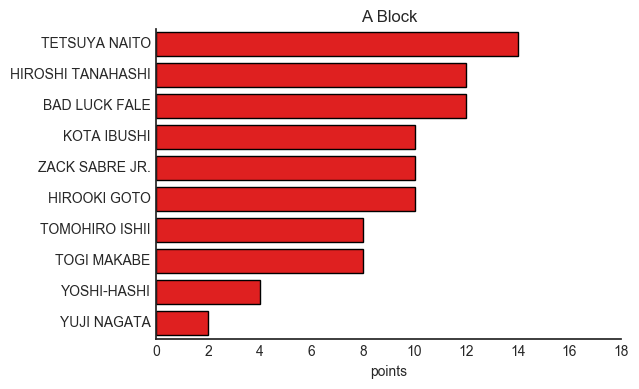

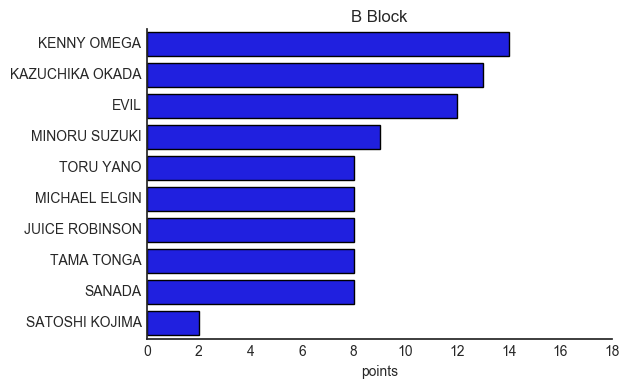

In [22]:

ax= sns.barplot(y='Wrestler', x='Points', data=A_Block, color= 'Red')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('')
ax.set_xlabel('points')
ax.set_title('A Block')
plt.show()
ax= sns.barplot(y='Wrestler', x='Points', data=B_Block,  color= 'Blue')
ax.set_xlim(0,18)
sns.despine()
ax.set_ylabel('') 
ax.set_xlabel('points')
ax.set_title('B Block')
plt.show()

In [50]:
A_matches

,Wrestler 1,Wrestler 2,Winner,Loser,Match,Match_Time,Draw
0,HIROSHI TANAHASHI,TOGI MAKABE,HIROSHI TANAHASHI,TOGI MAKABE,1,00:13:34,False
1,HIROSHI TANAHASHI,TOMOHIRO ISHII,HIROSHI TANAHASHI,TOMOHIRO ISHII,1,00:23:30,False
2,HIROSHI TANAHASHI,HIROOKI GOTO,HIROSHI TANAHASHI,HIROOKI GOTO,1,00:17:22,False
3,HIROSHI TANAHASHI,YOSHI-HASHI,HIROSHI TANAHASHI,YOSHI-HASHI,1,00:13:34,False
4,HIROSHI TANAHASHI,BAD LUCK FALE,HIROSHI TANAHASHI,BAD LUCK FALE,1,00:11:05,False
5,HIROSHI TANAHASHI,YUJI NAGATA,HIROSHI TANAHASHI,YUJI NAGATA,1,00:14:47,False
6,HIROSHI TANAHASHI,ZACK SABRE JR.,ZACK SABRE JR.,HIROSHI TANAHASHI,1,00:17:18,False
7,HIROSHI TANAHASHI,KOTA IBUSHI,KOTA IBUSHI,HIROSHI TANAHASHI,1,00:20:40,False
8,HIROSHI TANAHASHI,TETSUYA NAITO,TETSUYA NAITO,HIROSHI TANAHASHI,1,00:26:41,False
9,TOGI MAKABE,TOMOHIRO ISHII,TOMOHIRO ISHII,TOGI MAKABE,1,00:15:51,False


In [49]:
A_matches['Match_Time'] = pd.to_datetime(A_matches['Match_Time'], format='%M:%S').dt.time

In [42]:
pd.Timedelta(A_matches['Match_Time'])

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible